In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#01 Leitura de Arquivo CSV
df1 = pd.read_csv('jobs_in_data-1.csv')
df2 = pd.read_csv('jobs_in_data-2.csv')

In [4]:
#02 Mesclagem de Data Frames
df = pd.concat([df1, df2], ignore_index=True)
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [ ]:
#03 Identificação dos Tipos das Colunas
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [ ]:
#04 Preenchimento de Valores Faltantes
moeda_vazia = df[df['salary_currency'].isnull()]

uds_vazio = moeda_vazia['company_location'] == 'United States'
df.loc[uds_vazio.index, 'salary_currency'] = 'USD'

cad_vazio = moeda_vazia['company_location'] == 'Canada'
df.loc[cad_vazio.index, 'salary_currency'] = 'CAD'

gbp_vazio = moeda_vazia['company_location'] == 'United Kingdom'
df.loc[gbp_vazio.index, 'salary_currency'] = 'GBP'

df['salary_currency'].fillna('EUR', inplace=True)

In [ ]:
#05 Remoção de Linhas Duplicadas
df = df.drop_duplicates()

In [ ]:
#06 Identificando o Formato do DataFrame
df.shape

(5425, 12)

In [ ]:
#07 Salvando o DataFrame CSV
df.to_csv('jobs_in_data', index=0)

In [ ]:
#08 Identificação da Quantidade de Valores Únicos em 'job_category'
df['job_category'].nunique()

10

In [ ]:
#09 Identificação do Quantidade de Valores Únicos em 'job_title'
df['job_title'].nunique()

125

In [ ]:
#10 Contagem de Ocorrências de cada 'job_category'
df['job_category'].value_counts()

Data Science and Research         1676
Data Engineering                  1187
Machine Learning and AI            932
Data Analysis                      823
Leadership and Management          353
BI and Visualization               190
Data Architecture and Modeling     165
Data Management and Strategy        49
Data Quality and Operations         45
Cloud and Database                   5
Name: job_category, dtype: int64

In [ ]:
#11 Proporção Normalizada de cada 'job_category'
df['job_category'].value_counts(normalize=True)

Data Science and Research         0.308940
Data Engineering                  0.218802
Machine Learning and AI           0.171797
Data Analysis                     0.151705
Leadership and Management         0.065069
BI and Visualization              0.035023
Data Architecture and Modeling    0.030415
Data Management and Strategy      0.009032
Data Quality and Operations       0.008295
Cloud and Database                0.000922
Name: job_category, dtype: float64

In [ ]:
#12 Cálculo de Salários Mensais com a Função 'monthly_salary'
def monthly_salary(salary):
  return salary/12

df['monthly_salary'] = df['salary'].apply(monthly_salary).map('{:.2f}'.format)
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,monthly_salary
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,7333.33
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,15500.00
2,2023,Data Architect,Data Architecture and Modeling,GBP,81800,81800,United States,Senior,Full-time,In-person,United States,M,6816.67
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,17666.67
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,7775.00


In [ ]:
#13 Cálculo de Salários Mensais em USD com Função Lambda
df['monthly_salary_in_usd']=df['salary_in_usd'].apply(lambda salary: salary/12).map('{:.2f}'.format)
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,monthly_salary,monthly_salary_in_usd
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L,13750.00,13750.00
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L,34333.33,34333.33
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L,12583.33,12583.33
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S,8750.00,8750.00
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L,8333.33,8333.33


In [8]:
#14a Encontrando o Valor Máximo e sua Posição em 'salary_in_usd'.
salario_maximo = df['salary_in_usd'].max()

linhas_salario_maximo = df.loc[df['salary_in_usd'] == salario_maximo]
indices_salario_maximo = linhas_salario_maximo.index

print("Índices das Linhas com o Maior Salário em Dólar:", indices_salario_maximo)
print("Maior Salário em USD:", salario_maximo)

Índices das Linhas com o Maior Salário em Dólar: Int64Index([9157], dtype='int64')
Maior Salário em USD: 450000


In [10]:
#14b Encontrando o Valor Mínimo e sua Posição em 'salary_in_usd'.
salario_minimo = df['salary_in_usd'].min()

linhas_salario_minimo = df.loc[df['salary_in_usd'] == salario_minimo]
indices_salario_minimo = linhas_salario_minimo.index

print("Índices das Linhas com o Menor Salário em Dólar:", indices_salario_minimo)
print("Menor Salário em USD:", salario_minimo)

Índices das Linhas com o Menor Salário em Dólar: Int64Index([3683, 5882, 8490, 8784], dtype='int64')
Menor Salário em USD: 15000


In [9]:
#15 Seleção de Linha Específica no DataFrame 'df' usando 'iloc'
df.iloc[indices_salario_maximo][:]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9157,2020,Research Scientist,Data Science and Research,USD,450000,450000,United States,Mid-level,Full-time,In-person,United States,M


In [ ]:
#16 Cálculo de Média utilizando .mean()
# Qual a média salarial?

media_salarial = '${:,.2f}'.format(df['salary'].mean())
media_salarial

'$145,994.33'

In [ ]:
#17 Agrupamento utilizando .groupby()
# Qual a média salarial por categoria?
df.groupby(['job_category'])['salary_in_usd'].mean().sort_values(ascending=False).map('${:,.2f}'.format)

job_category
Machine Learning and AI           $178,925.85
Data Science and Research         $163,758.58
Data Architecture and Modeling    $156,002.36
Cloud and Database                $155,000.00
Data Engineering                  $146,197.66
Leadership and Management         $145,476.02
BI and Visualization              $135,092.10
Data Analysis                     $108,505.72
Data Management and Strategy      $103,139.93
Data Quality and Operations       $100,879.47
Name: salary_in_usd, dtype: object

In [ ]:
#18 Identificação de Maiores\Menores Valores utilizando 'max' e 'min'
# Quais o maior e menor salários de cada categoria?
agg_salaries = df.groupby('job_category')['salary_in_usd'].agg(['max', 'min']).sort_values(by=['max'],ascending=False)
agg_salaries

,max,min
job_category,,
Data Science and Research,450000,16000
Data Analysis,430967,15000
Leadership and Management,430640,20000
Machine Learning and AI,423000,15000
Data Engineering,385000,18000
Data Architecture and Modeling,376080,52500
Data Quality and Operations,289120,23753
BI and Visualization,259900,15000
Data Management and Strategy,250000,46400


In [ ]:
#19 Somando Linhas utilizando .value_counts()
# Qual o local de residência da maioria dos empregados?
df['employee_residence'].value_counts().head()

United States     4787
United Kingdom     378
Canada             204
Spain               65
Germany             65
Name: employee_residence, dtype: int64

In [ ]:
# Qual é a média salarial de cada país?
df.groupby(['employee_residence'])['salary_in_usd'].agg(['mean']).sort_values(by=['mean'], ascending=False)
df.groupby(['employee_residence'])['salary_in_usd'].mean().map('${:,.2f}'.format)

employee_residence
Algeria                 $100,000.00
American Samoa           $45,555.00
Andorra                  $50,745.00
Argentina                $56,444.44
Armenia                  $33,500.00
                           ...     
United Arab Emirates    $100,000.00
United Kingdom          $107,591.99
United States           $158,815.66
Uzbekistan               $82,000.00
Vietnam                  $44,200.00
Name: salary_in_usd, Length: 83, dtype: object

In [ ]:
# Qual o regime de trabalho mais utilizado?
df['work_setting'].value_counts()

In-person    3273
Remote       2448
Hybrid        189
Name: work_setting, dtype: int64

In [ ]:
# Qual a média salarial por nível de experiência?
df.groupby(['experience_level'])['salary_in_usd'].agg(['mean', 'max', 'min']).sort_values(by=['mean'], ascending=False)
df.groupby(['experience_level'])['salary_in_usd'].mean().map('${:,.2f}'.format)

experience_level
Entry-level     $84,365.24
Mid-level      $116,319.71
Senior         $162,497.47
Executive      $188,013.29
Name: salary_in_usd, dtype: object

In [ ]:
# Qual a média salarial de acordo com o tamanho da empresa?
df.groupby(['company_size'])['salary_in_usd'].agg(['mean', 'max', 'min']).sort_values(by=['mean'], ascending=False)
df.groupby(['company_size'])['salary_in_usd'].mean().map('${:,.2f}'.format)

company_size
L    $128,485.93
M    $150,968.98
S     $90,849.20
Name: salary_in_usd, dtype: object

In [ ]:
# Qual o desvio padrão do salário de cada cargo?
desvio_salario_cargo = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].std()
desvio_salario_cargo.dropna().map('${:,.2f}'.format)

job_title               experience_level
AI Architect            Senior               $70,780.19
AI Developer            Entry-level          $60,443.54
                        Mid-level            $62,575.94
                        Senior               $82,403.82
AI Engineer             Entry-level           $9,480.18
                                               ...     
Research Scientist      Executive            $70,589.05
                        Mid-level            $82,979.74
                        Senior               $62,789.59
Software Data Engineer  Senior              $113,137.08
Staff Data Scientist    Senior               $41,719.30
Name: salary_in_usd, Length: 206, dtype: object

In [ ]:
# Quais cargos têm as maiores médias salariais?
media_salario_cargo = df.groupby('job_title')['salary_in_usd'].mean()

top_cargos = media_salario_cargo.nlargest(3)

df_top_cargos = pd.DataFrame({'descricao_cargo': top_cargos.index, 'media_salarial': top_cargos.values})
df_top_cargos['media_salarial'] = df_top_cargos['media_salarial'].map('${:,.2f}'.format)

print(df_top_cargos)

                  descricao_cargo media_salarial
0   Analytics Engineering Manager    $399,880.00
1          Data Science Tech Lead    $375,000.00
2  Managing Director Data Science    $300,000.00


In [ ]:
#20 Criação de Colunas
# Qual a variação de pagamento para a média salarial de cada cargo?
media_salario_cargo = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
media_salario_cargo = media_salario_cargo.rename(columns={'salary_in_usd': 'salary_mean'})

df = pd.merge(df, media_salario_cargo, on='job_title', how='left')

df['salary_variation'] = (df['salary_in_usd'] - df['salary_mean']) / df['salary_mean'] * 100

df['salary_variation'] = df['salary_variation'].map('{:.2f}'.format)
df['salary_mean'] = df['salary_mean'].map('{:.2f}'.format)

df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_mean,salary_variation
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,74498.00,27.54
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,164060.52,13.37
2,2023,Data Architect,Data Architecture and Modeling,NaN,81800,81800,United States,Senior,Full-time,In-person,United States,M,164060.52,-50.14
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,156681.02,35.31
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,156681.02,-40.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L,103102.50,60.03
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L,156681.02,162.95
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L,194089.60,-22.20
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S,156681.02,-32.98


In [ ]:
# Qual país possui a menor média salarial para cada cargo?
grouped_data = df.groupby(['job_title', 'employee_residence'])['salary_in_usd'].mean().reset_index()

idx = grouped_data.groupby('job_title')['salary_in_usd'].idxmin()
grouped_data.loc[idx]

,job_title,employee_residence,salary_in_usd
0,AI Architect,Belgium,215936.0
7,AI Developer,Italy,53984.0
13,AI Engineer,Portugal,21593.0
21,AI Programmer,Pakistan,40000.0
23,AI Research Engineer,Portugal,24940.0
...,...,...,...
464,Sales Data Analyst,Nigeria,60000.0
465,Software Data Engineer,Nigeria,50000.0
469,Staff Data Analyst,Nigeria,15000.0
471,Staff Data Scientist,United States,134500.0


In [ ]:
#21 Conversão de Tipo
# Quais cargos 'Entry-level' têm a maior média salarial?
df['salary_mean'] = pd.to_numeric(df['salary_mean'])

dados_junior = df[df['experience_level'] == 'Entry-level']
junior_media = dados_junior.groupby('job_title')['salary_mean'].mean()

junior_media.nlargest(3).map('${:,.2f}'.format)

job_title
ML Engineer               $197,455.22
Deep Learning Engineer    $190,807.50
Applied Scientist         $190,171.61
Name: salary_mean, dtype: object

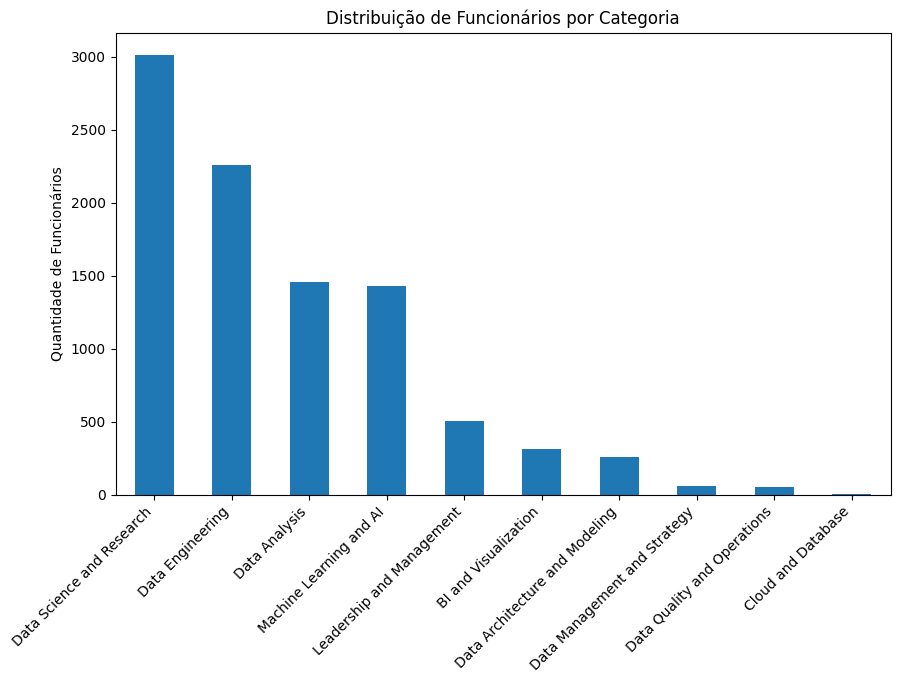

In [ ]:
#22 Visualização de Dados utilizando Matplotlib
# Qual a distribuição de funcionários por categoria de trabalho?
plt.figure(figsize=(10, 6))
df['job_category'].value_counts().plot(kind='bar')
plt.title('Distribuição de Funcionários por Categoria de Trabalho')
plt.ylabel('Quantidade de Funcionários')
plt.xticks(rotation=45, ha='right')

plt.show()

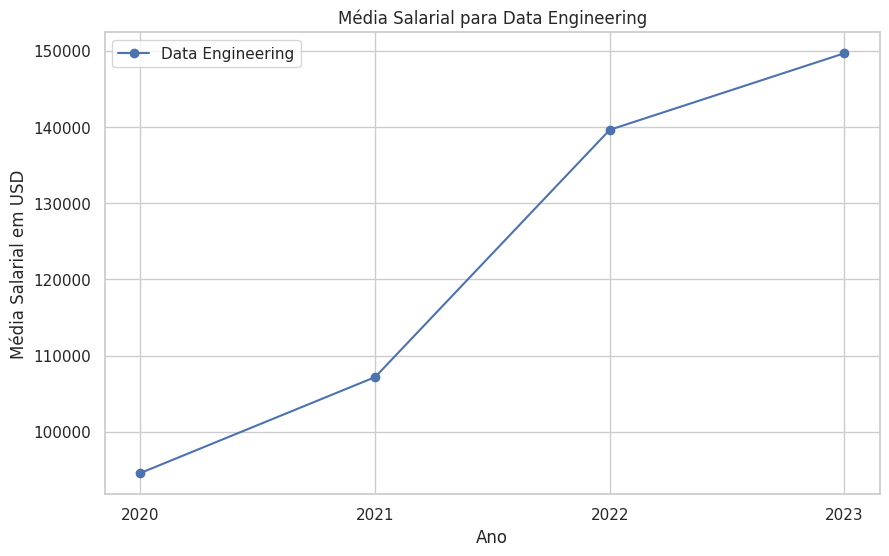

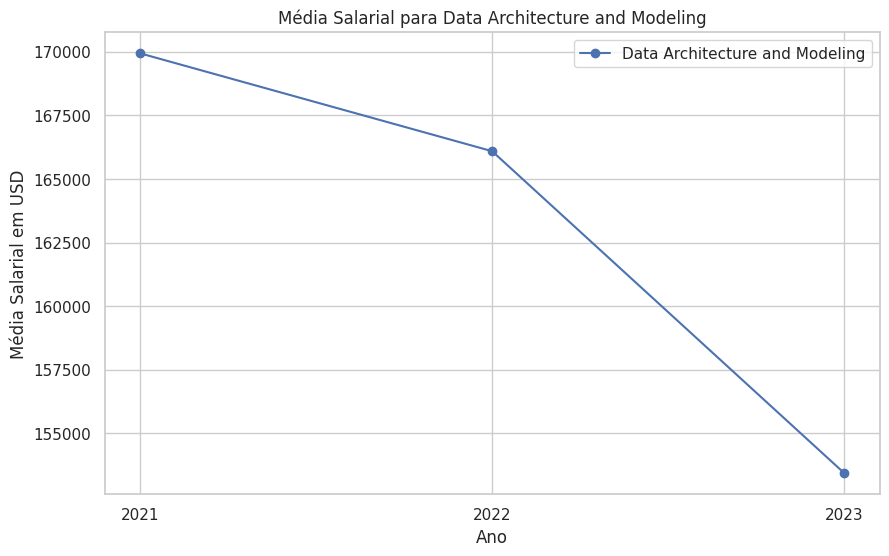

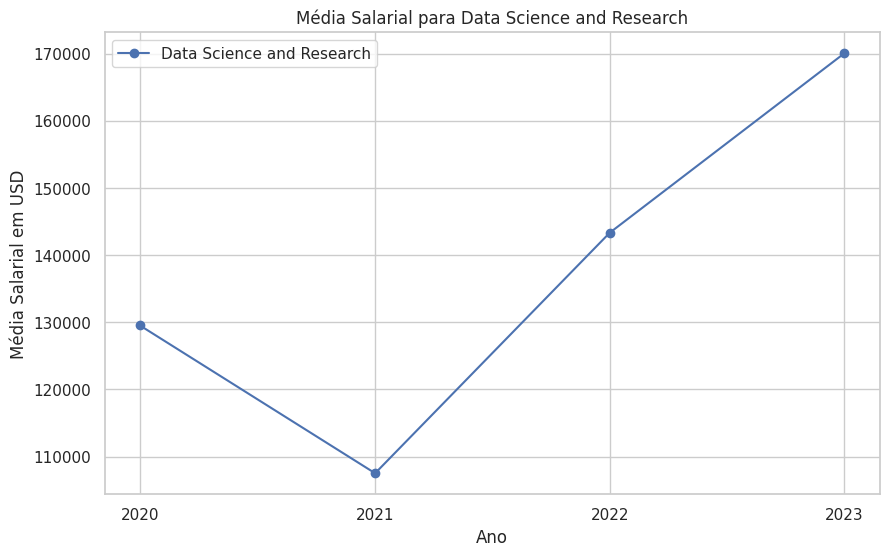

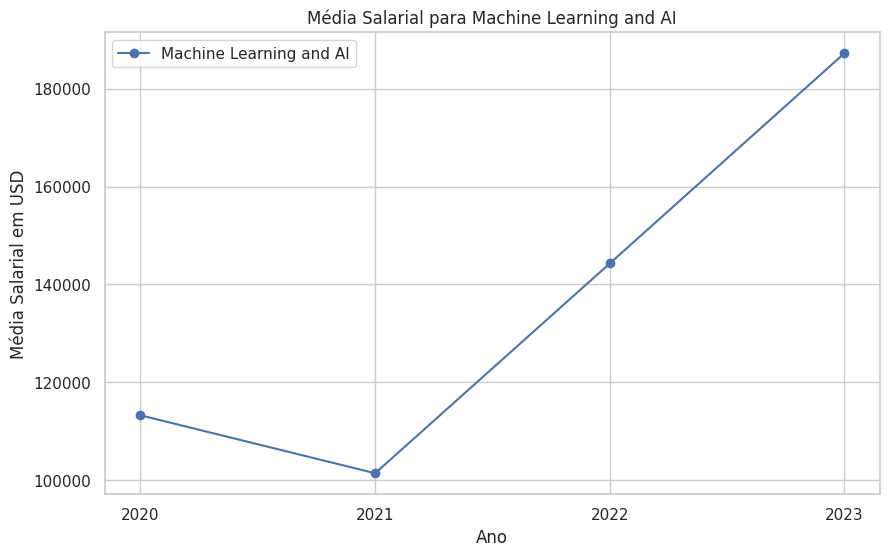

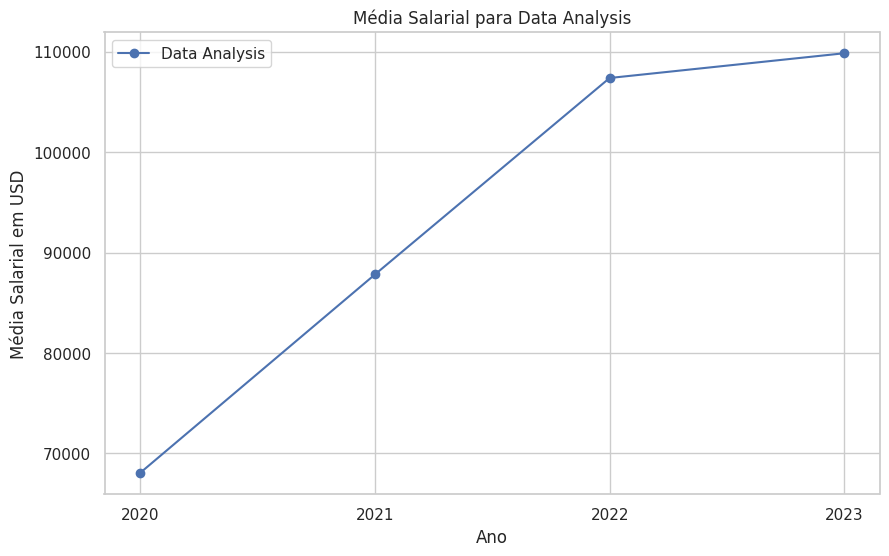

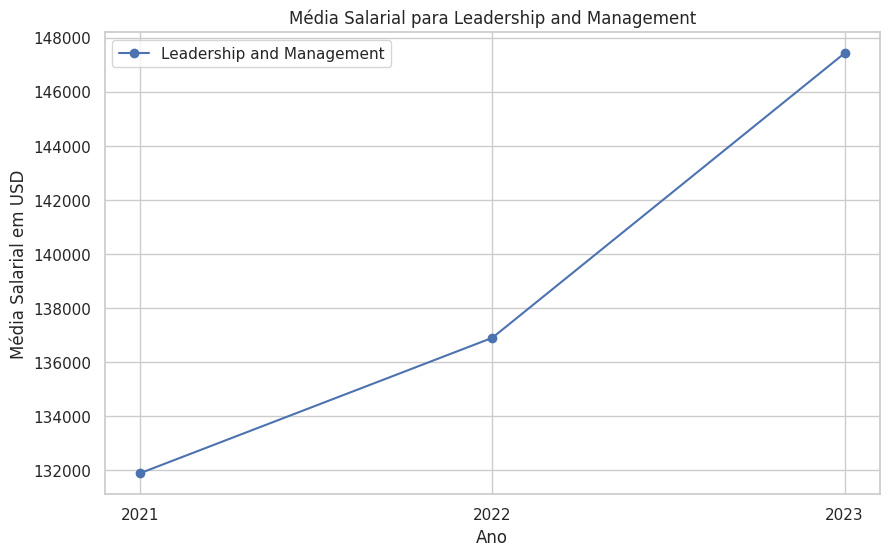

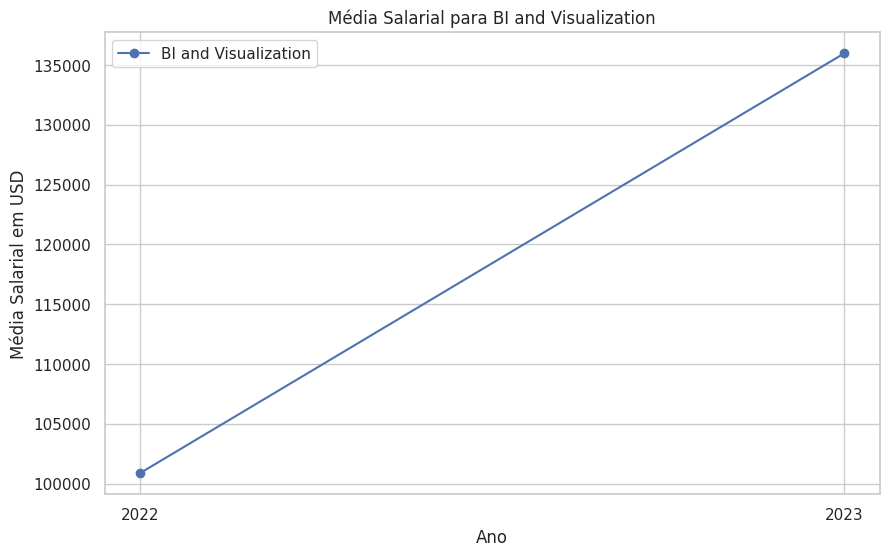

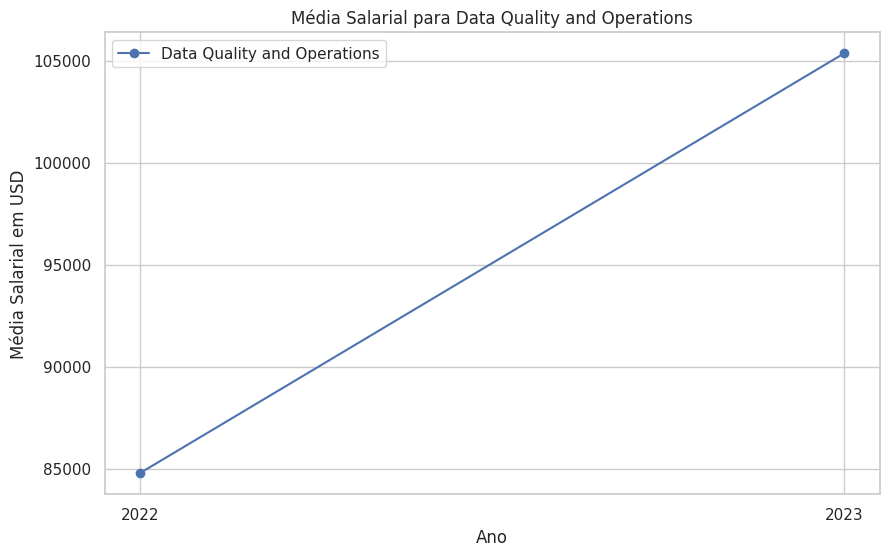

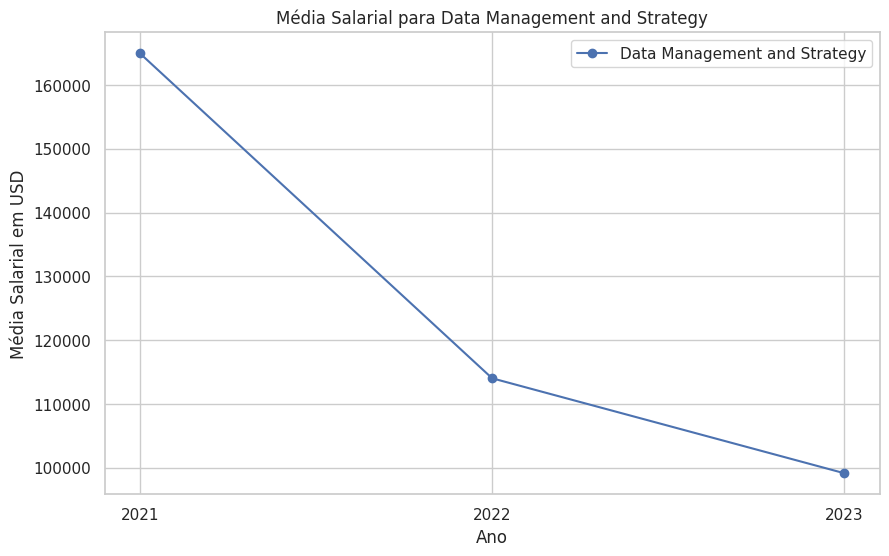

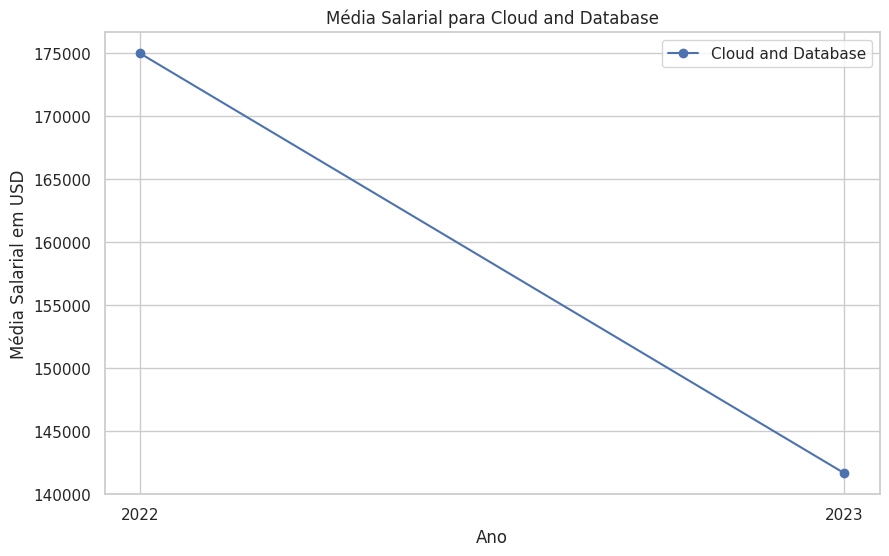

In [ ]:
#23 Manipulação e Tratamento de Datas
# Qual a variação da média salarial de cada categoria?
from matplotlib.dates import YearLocator

df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

for category in df['job_category'].unique():
    filtro_categorias = df[df['job_category'] == category]

    media_anual = filtro_categorias.groupby('work_year')['salary_in_usd'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(media_anual['work_year'], media_anual['salary_in_usd'], marker='o', label=category)
    plt.title(f'Média Salarial para {category}')
    plt.xlabel('Ano')
    plt.ylabel('Média Salarial em USD')
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.legend()
    plt.show()

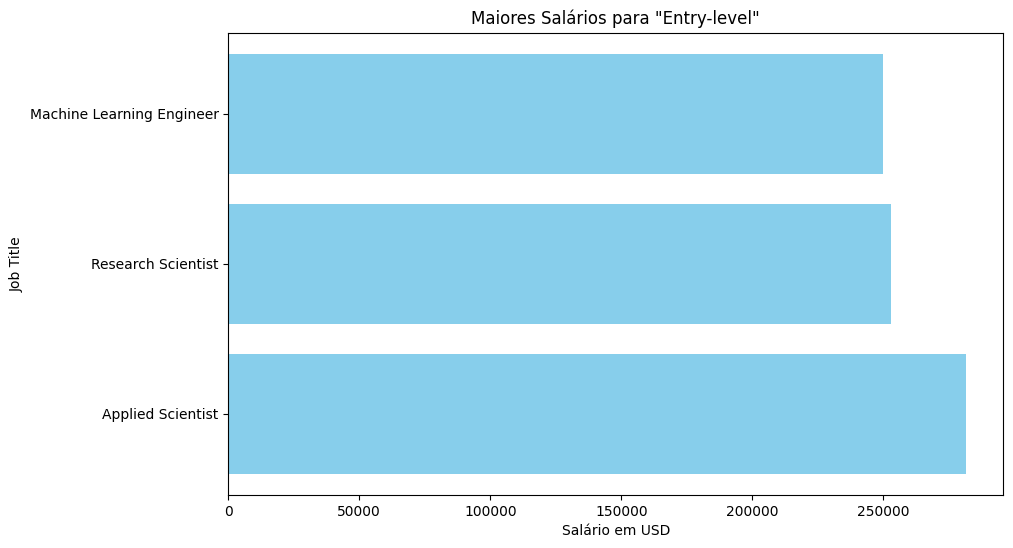

In [12]:
# Quais os cargos com os três maiores salários para o nível de experiência 'Entry-level'
entry_data = df[df['experience_level'] == 'Entry-level']
sorted_entry_data = entry_data.sort_values(by='salary_in_usd', ascending=False)

top_sal_entry = sorted_entry_data.drop_duplicates(subset=['job_title']).head(3)

if len(top_sal_entry) < 3:
    remaining_salaries = sorted_entry_data[~sorted_entry_data['job_title'].isin(top_sal_entry['job_title'])]
    top_sal_entry = pd.concat([top_sal_entry, remaining_salaries.head(1)])

plt.figure(figsize=(10, 6))
plt.barh(top_sal_entry['job_title'], top_sal_entry['salary_in_usd'], color='skyblue')
plt.xlabel('Salário em USD')
plt.ylabel('Job Title')
plt.title('Maiores Salários para "Entry-level"')
plt.show()

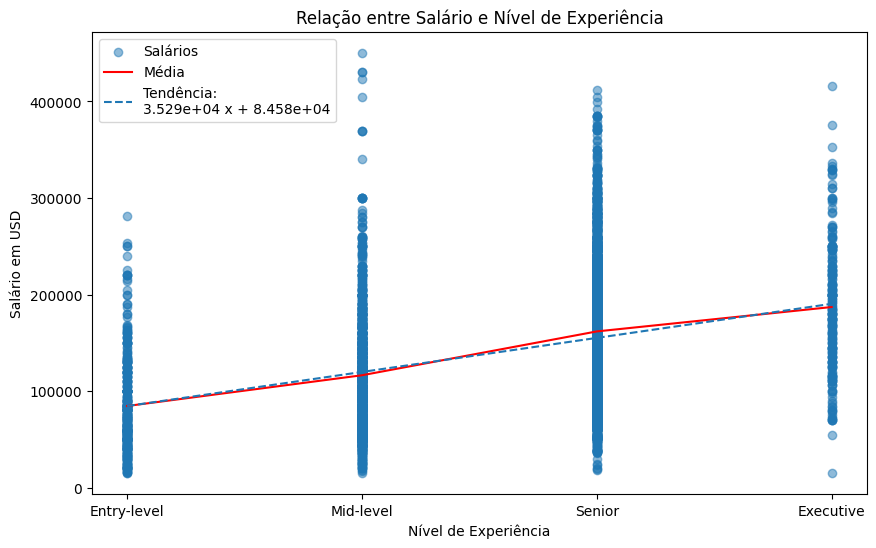

In [ ]:
# Qual a relação entre o valor médio dos salários e o nível de experiência?
ordem_exp = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
df['experience_level'] = pd.Categorical(df['experience_level'], categories=ordem_exp, ordered=True)

df = df.sort_values('experience_level')

media_salario_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

coeficientes = np.polyfit(media_salario_exp.index, media_salario_exp['salary_in_usd'], 1)
polinomio = np.poly1d(coeficientes)

plt.figure(figsize=(10, 6))
plt.scatter(df['experience_level'], df['salary_in_usd'], alpha=0.5, label='Salários')
plt.plot(media_salario_exp['experience_level'], media_salario_exp['salary_in_usd'], color='red', label='Média')
plt.plot(media_salario_exp['experience_level'], polinomio(media_salario_exp.index), linestyle='--', label=f'Tendência: {polinomio}')

plt.title('Relação entre Salário e Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.legend()

plt.show()